# Исследование объявлений о продаже квартир

### Описание исследования.

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости.

### Цель исследования.

Наша цель — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

### Задачи, выполняемые в рамках исследовательского анализа данных.

* Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.


* Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?


* Уберём редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.


* Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.


* Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.


* Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.


* Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всему городу?

### Исходные данные.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

### Данное исследование разделим на несколько частей.

[Часть 1. Изучение данных](#step1)

[Часть 2. Предобработка данных](#step2)

   * [2.1. Перименование столбцов и обработка аномальных данных](#step21)
   * [2.2. Определение и изучение пропущенных значений](#step22)
   * [2.3. Обработка пропусков](#step23)
   * [2.4. Замена типа данных](#step24)
   
[Часть 3. Расчёты и добавление результатов в таблицу](#step3)

   * [3.1. Цена квадратного метра](#step31)
   * [3.2. День недели, месяц и год публикации объявления](#step32)
   * [3.3. Этаж квартиры, варианты — первый, последний, другой](#step33)
   * [3.4. Соотношение жилой и общей площади](#step34)
   * [3.5. Соотношение площади кухни к общей](#step35)
   
[Часть 4. Исследовательский анализ данных:](#step4)

   * [4.1. Изучение общих параметров жилья](#step41)
   * [4.2. Изучение времени продажи квартиры](#step42)
   * [4.3. Уберём редкие и выбивающиеся значения](#step43)
   * [4.4. Изучим влияние различных факторов на стоимость квартиры](#step44)
   * [4.5. Изучим зависимость стоимости от населённого пункта](#step45)
   * [4.6. Изучим зависимость стоимости квартир в Санкт-Петербурге от удалённости от центра](#step46)
   * [4.7. Выделим центральный сегмент и изучим квартиры в сравнении со всем городом](#step47)
   
[Часть 5. Общий вывод](#step5)

## Часть 1. Изучение данных из файла <a id="step1"></a>
Импортируем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Откроем таблицу с данными и изучим первые строки.

In [2]:
if os.path.exists('real_estate_data.csv'): # проверка валидности пути к датасету при работе локально и с портала
    df = pd.read_csv('real_estate_data.csv', sep='\t')
else:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим общую информацию по данным.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посмотрим статистическую информацию по данным.

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

Требуется переименование столбцов.

Много пропусков данных в разных столбцах. Есть явно аномальные значения.

Нужно выяснить подробнее в каких данных допущены пропуски, какие из них мы сможем заполнить, какие в заполнении не нуждаются, какие заполнить невозможно.

Столбец `is_apartment` должен иметь тип данных `boolean`, есть и другие столбцы с неоптимальным типом данных. Исправим это на предобработке.

## Часть 2. Предобработка данных <a id="step2"></a>

## 2.1. Перименование столбцов и обработка аномальных данных <a id="step21"></a>

Сначала приведём названия столбцов к змеиному регистру.

In [5]:
df = df.rename(columns={
    'cityCenters_nearest': 'city_centers_nearest',
    'parks_around3000': 'parks_around_3000',
    'ponds_around3000': 'ponds_around_3000'
})

Проверим уникальные значения для некоторых данных.

В столбце `last_price` минимальное значение аномально низкое, проверим самые дешёвые позиции в списке.

In [6]:
df.sort_values(by='last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,...,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0


Вероятнее всего цена за квартиру в черте города площадью 109 м.кв. указана в тысячах рублей, исправим.

In [7]:
df.at[8793, 'last_price'] = 12190000

В столбце `rooms` есть нулевые значения. Можно воспользоваться средним количеством комнат для групп по общей площади.

Проверим различные значения общей площади в зависимости от количества комнат.

In [8]:
df.pivot_table(index='rooms', values='total_area', aggfunc=['count', 'min', 'max', np.mean, 'median'])

,count,min,max,mean,median
,total_area,total_area,total_area,total_area,total_area
rooms,,,,,
0,197,15.5,371.0,29.279746,26.05
1,8047,12.0,494.1,37.644669,36.56
2,7940,20.0,196.0,55.855089,53.00
3,5814,40.1,363.1,77.764580,73.00
4,1180,42.0,500.0,107.610763,99.30
5,326,40.0,507.0,161.474816,146.45
6,105,87.0,500.0,201.537619,184.30
7,59,100.6,631.2,265.325424,214.00


А также проверим коэффициент корреляции Пирсона для этих величин.

In [9]:
df['rooms'].corr(df['total_area'])

0.7583438234725676

Степень корреляции высокая, поэтому заменим значения опираясь на медианные значения площадей квартир с определённым количеством комнат.

In [10]:
median_areas = df.groupby('rooms')['total_area'].agg('median') # выведем медианные значения в отдельный список

def room_repair(row):
    '''
    Функция возвращает количество комнат, ориентируясь на общую площадь квартиры, если исходное значение = 0.
    '''
    if row['rooms'] == 0:
        for i in range(1, len(median_areas)):
            if abs(median_areas[i-1] - row['total_area']) > abs(median_areas[i] - row['total_area']):
                continue
            else:
                break
        return median_areas.index[i]
    else:
        return row['rooms']

df['rooms'] = df.apply(room_repair, axis=1)

В столбце `ceiling_height` потолки высотой 100 м маловероятны, так же есть большое количество пропусков.

In [11]:
df[df['ceiling_height'] > 5]['ceiling_height'].unique()

array([ 25. ,   5.2,   5.3,   5.6,  32. ,   8. ,  27. ,  24. ,  26. ,
         8.3,   5.5,  14. ,  20. ,   6. ,  22.6,   5.8,  27.5,  10.3,
       100. ])

Заменим значения с явной ошибкой в точке. А также значение 100.

In [12]:
wrong_heights = [25, 32, 27, 24, 26, 22.6, 27.5]

def ceiling_repair(height):
    '''
    Функция проверяет вхождение значений в столбце в список с неправильной точкой и исправляет.
    '''
    if height in wrong_heights:
        return height/10
    else:
        return height

df['ceiling_height'] = df['ceiling_height'].transform(ceiling_repair)

df['ceiling_height'] = df['ceiling_height'].transform(lambda x: np.nan if x == 100 else x)

Проверим общее количество оставшихся аномально-высоких значений.

In [13]:
df[df['ceiling_height'] > 5]['ceiling_height'].nunique()

11

А также общее количество аномально-низких значений.

In [14]:
df[df['ceiling_height'] < 2.2]['ceiling_height'].nunique()

4

Общее количество строк с аномальными потолками небольшое, на общую картину не повлияет, можно оставить как есть.

В столбце `airports_nearest` есть слишком маленькие значения. Проверим их количество.

In [15]:
df[df['airports_nearest'] < 500]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,NaN,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Одна строка. Заменим значение на NaN.

In [16]:
df.at[21085, 'airports_nearest'] = np.nan

### Вывод

Мы привели названия столбцов к стандарту PEP 8.

Убрали б*o*льшую часть аномальных значений, оставшиеся не должны значительно повлиять на результаты анализа.

Можно переходить к анализу пропущенных значений.

## 2.2. Определение и изучение пропущенных значений <a id="step22"></a>

Посмотрим ещё раз на статистическую информацию по датафрейму.

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.542063e+06,1.088699e+07,430000.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.080552e+00,1.067263e+00,1.0,1.00,2.00,3.0,19.0
ceiling_height,14503.0,2.730348e+00,3.452479e-01,1.0,2.51,2.65,2.8,20.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Некоторые пропуски можно объяснить логически, так, отсутствие значений в столбцах, может говорить о:

   * `balcony` - отсутствии балкона
   * `parks_nearest` - отсутствие парка вблизи квартиры
   * `ponds_nearest` - отсутствие водоёма вблизи квартиры
   
В столбцах `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `ponds_around_3000` - отсутствует большое количество данных. Т.к. эти данные заполнялись автоматически, проверим одновременность появления пропусков в данных.

In [18]:
df[df['airports_nearest'].isna()].count()

total_images            5543
last_price              5543
total_area              5543
first_day_exposition    5543
rooms                   5543
ceiling_height          2965
floors_total            5533
living_area             4918
floor                   5543
is_apartment             631
studio                  5543
open_plan               5543
kitchen_area            4826
balcony                 2826
locality_name           5535
airports_nearest           0
city_centers_nearest      25
parks_around_3000         25
parks_nearest             20
ponds_around_3000         25
ponds_nearest              8
days_exposition         4676
dtype: int64

По 20-25 несовпадающих значений.

Вероятнее всего пользователь не указывал при размещении объявления адрес объекта и система не могла вычислить данные автоматически. Восстановить эти данные без точных адресов не представляется возможным. Придётся оставить как есть.

Невозможно восстановить данные в столбце `ceiling_height`, т.к. высота потолков не зависит напрямую от площади или количества балконов.

А также восстановить `locality_name` по косвенным признакам без адреса.

Проверим коэффициенты Пирсона для данных.

In [19]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
total_images,1.000000,0.104449,0.115352,0.096701,0.047317,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002518,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104449,1.000000,0.653741,0.366965,0.320771,-0.006881,0.566487,0.026760,-0.025366,-0.008805,0.520167,0.029646,-0.026215,-0.206781,0.151086,-0.016324,0.159951,-0.084809,0.081103
total_area,0.115352,0.653741,1.000000,0.762353,0.390039,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030851,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.096701,0.366965,0.762353,1.000000,0.245003,-0.223514,0.850407,-0.148332,-0.069030,-0.033805,0.269945,0.022276,-0.063918,-0.188035,0.135838,-0.053116,0.094122,-0.057250,0.125432
ceiling_height,0.047317,0.320771,0.390039,0.245003,1.000000,-0.069882,0.366869,-0.029445,0.014822,0.009101,0.341082,-0.033081,-0.090873,-0.290942,0.217878,-0.033125,0.183403,-0.130225,0.116428
floors_total,0.010427,-0.006881,-0.075774,-0.223514,-0.069882,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108262,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566487,0.939537,0.850407,0.366869,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.058015,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026760,-0.024754,-0.148332,-0.029445,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071528,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025366,-0.072653,-0.069030,0.014822,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021888,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008805,-0.034885,-0.033805,0.009101,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013591,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


Исходя из наличия корреляции, данные в некоторых столбцах можно восстановить:
   
   * `kitchen_area` - взяв средние/медианные значения для групп, исходя из площади квартиры
   * `living_area` - взяв средние/медианные значения для групп, исходя из площади квартиры

Значения столбца `floors_total` можно восстановить, взяв за максимальный этаж значение из колонки `floor`.
   
Столбец `is_apartment` должен иметь тип данных `boolean`, отстутвующие значения, вероятно, должны принимать значение False

Пропущенные значения из `days_exposition` восстановить скорее всего не удастся, явной корреляции с другими величинами нет.

### Вывод

Мы проанализировали пропуски и выделили три группы:

   * данные которые можно восстановить исходя из анализа остальных значений столбца
   * данные имеющие явную зависимоть от значений других столбцов
   * данные не имеющие явных зависимостей и не подлежащие восстановлению

Можно переходить к обработке пропусков.

## 2.3. Обработка пропусков <a id="step23"></a>

Для столбцов `balcony` отсутствует явная корреляция с другими признаками, уверенности что пропуски это нулевое количество балконов нет, поэтому оставим пропуски без изменений.

Также не удастся заполнить автоматичски заполняемые сервисом столбцы `airports_nearest`, `city_centers_nearest`, `parks_around_3000`, `ponds_around_3000`. Данные в них взяты на основе картографии. Вероятно, пользователи не указывали местоположение для этих объектов.

Пропуски в столбцах `parks_nearest` и `ponds_nearest` могут говорить об отсутствии парка или водоёма вблизи объекта, проверим это, сопоставив с расстоянием до ближайшего окружения.

In [20]:
df[df['parks_around_3000'] == 0]['parks_nearest'].unique()

array([  nan, 3064., 3190., 3013.])

In [21]:
df[df['ponds_around_3000'] == 0]['ponds_nearest'].unique()

array([nan])

In [22]:
df[df['parks_nearest'].isna()]['parks_around_3000'].unique()

array([ 0., nan])

In [23]:
df[df['ponds_nearest'].isna()]['ponds_around_3000'].unique()

array([ 0., nan])

Предположение подтвердилось, `NaN` появляется в этих столбцах, когда парка или водоёма нет в радиусе 3000 м.

Пропуски можно было бы заполнить нулевыми значениями, но в этом нет смысла, т.к. при визуальном анализе зависимостей это лишь ухудшит читаемость чертежей. Оставим как есть.

Данные по высотам потолков в столбце `ceiling_height` не имеют сильной прямой корреляции с другими величинами, поэтому придётся оставить эти данные без изменений.
Максимальный коэффициент корреляции Пирсона для этого параметра составил:

In [24]:
df.corr()['ceiling_height'].abs().sort_values(ascending=False)[1]

0.3900389855594683

Данные из столбца `locality_name` нельзя восстановить по косвенным признакам без адреса. Оставим как есть.

Пропуски в столбце `is_apartment` могут говорить о том что объект не является апартаментами, но одназначного вывода из доступных данных сделать нельзя, поэтому оставим пропуски на месте.

Пропущенные значения из `days_exposition` не имеют явной корреляции с другими величинами. Оставим пропуски.

Пропущенные значения столбца `kitchen_area` восстановим исходя из общей площади объекта, т.к. коэффициент Пирсона высокий:

In [25]:
df['kitchen_area'].corr(df['total_area'])

0.6091211711198313

Категоризируем данные по общей площади и заменим отсутствующие значения площади кухни средними по каждой категории.

In [26]:
df['area_category'] = pd.qcut(df['total_area'], 100, duplicates='drop', labels=False)

In [27]:
df['kitchen_area'] = df.groupby('area_category')['kitchen_area'].apply(lambda x: x.fillna(x.mean())).round(decimals=2)

Воспользуемся категоризированными данными также для заполнения пропущенных значений в столбце `living_area`.

In [28]:
df['living_area'] = df.groupby('area_category')['living_area'].apply(lambda x: x.fillna(x.mean())).round(decimals=2)

Удалим добавленный столбец с категориями.

In [29]:
df.drop(columns='area_category', inplace=True)

Восстановим значения столбца `floors_total`, взяв за максимальный этаж значение из колонки `floor`.

In [30]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])

Проверим итоговый результат заполнения.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14503 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Мы заполнили найденные пропуски где это было возможным:

   * данные которые можно восстановить исходя из анализа остальных значений столбца
   * данные имеющие явную зависимоть от значений других столбцов
   
Некоторые данные пришлось оставить без изменения, т.к. они не имеют явной зависимости от других данных и не могут быть заполнены логически. Однако и удалять эти данные нельзя. т.к. их количество значительное и в остальных колонках есть значения, которые мы сможем проанализировать.
   
Можно переходить к замене типов данных.

## 2.4. Замена типа данных <a id="step24"></a>

Проверим диапазоны значений в столбцах после замены аномальных данных и пропусков.

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.542063e+06,1.088699e+07,430000.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.080552e+00,1.067263e+00,1.0,1.00,2.00,3.0,19.0
ceiling_height,14503.0,2.730348e+00,3.452479e-01,1.0,2.51,2.65,2.8,20.0
floors_total,23699.0,1.067146e+01,6.595802e+00,1.0,5.00,9.00,16.0,60.0
living_area,23699.0,3.458048e+01,2.214686e+01,2.0,18.70,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,23699.0,1.050673e+01,5.762396e+00,1.3,7.00,9.11,11.9,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Исходя из возможного диапазона значений заменим следующие типы данных:

   * `rooms`, `floors_total`, `floor` на тип **int8**
   * `total_images` на тип **int16**
   * `last_price` на тип **int64**
   * `balcony`, `parks_around_3000`, `ponds_around_3000` на тип **category**

In [33]:
df = df.astype({
    'rooms':'int8', 'floors_total':'int8', 'floor':'int8',
    'total_images':'int16',
    'last_price':'int64',
    'balcony':'category', 'parks_around_3000':'category', 'ponds_around_3000':'category'
})

Проверим уникальные значения столбца `is_apartment`.

In [34]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Можно заменить на тип **category**

In [35]:
df['is_apartment'] = df['is_apartment'].astype('category')

Пересчитаем уникальные значения столбца `locality_name`.

In [36]:
df['locality_name'].nunique()

364

Данному столбцу также можно сменить тип на **category**

In [37]:
df['locality_name'] = df['locality_name'].astype('category')

Остался последний столбец для преобразования - `first_day_exposition`

In [38]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим итоговые данные по таблице.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int16         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int8          
 5   ceiling_height        14503 non-null  float64       
 6   floors_total          23699 non-null  int8          
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int8          
 9   is_apartment          2775 non-null   category      
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [40]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,87.24,9,NaN,...,22.64,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Мы заменили типы данных в некоторых столбцах на более рациональные.

Это позволило упростить данные, уменьшить размер датафрейма на 38% и упростить работу с ними.

К сожалению, из-за пропусков не все данные возможно оптимизировать.

Теперь данные готовы для добавления дополнительных колонок.

## Часть 3. Расчёты и добавление результатов в таблицу <a id="step3"></a>

## 3.1. Цена квадратного метра <a id="step31"></a>

Добавим столбец с ценой квадратного метра.

In [41]:
df['square_price'] = (df['last_price']/df['total_area']).astype('int32')

## 3.2. День недели, месяц и год публикации объявления <a id="step32"></a>

Для последующего анализа добавим столбы с днями недели, месяцами и годами публикации.

In [42]:
df['day_of_week'] = (
    df['first_day_exposition']
    .dt.day_name()
    .astype('category')
    .cat.reorder_categories(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
)

df['month'] = (
    df['first_day_exposition']
    .dt.month_name()
    .astype('category')
    .cat.reorder_categories([
        'January', 'February', 'March', 'April',
        'May', 'June', 'July', 'August',
        'September', 'October', 'November', 'December'
    ])
)

df['year'] = df['first_day_exposition'].dt.year.astype('int16')

## 3.3. Этаж квартиры, варианты — первый, последний, другой <a id="step33"></a>

Добавим категорию этажа.

In [43]:
def floor_categorization(row):
    '''
    Функция проверяет принадлежность значения этажа к одной из категорий.
    '''
    if row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    elif row['floor'] == np.nan:
        return np.nan
    else:
        return 'другой'

df['floor_category'] = df.apply(floor_categorization, axis=1).astype('category')

## 3.4. Соотношение жилой и общей площади <a id="step34"></a>

Добавим колонку с соотношением площадей жилой и общей.

In [44]:
df['living_to_total'] = (df['living_area']/df['total_area']).astype('float32').round(decimals=2)

## 3.5. Соотношение площади кухни к общей <a id="step35"></a>

А также с соотношением площадей кухни и общей.

In [45]:
df['kitchen_to_total'] = (df['kitchen_area']/df['total_area']).astype('float32').round(decimals=2)

Выставим последовательный порядок столбцов.

In [46]:
df = df[[
    'total_images',
    'last_price',
    'total_area',
    'square_price',
    'first_day_exposition',
    'day_of_week',
    'month',
    'year',
    'rooms',
    'ceiling_height',
    'living_area',
    'kitchen_area',
    'living_to_total',
    'kitchen_to_total',
    'floor',
    'floors_total',
    'floor_category',
    'is_apartment',
    'studio',
    'open_plan',
    'balcony',
    'locality_name',
    'airports_nearest',
    'city_centers_nearest',
    'parks_around_3000',
    'parks_nearest',
    'ponds_around_3000',
    'ponds_nearest',
    'days_exposition'
]]

Проверим как выглядит таблица с обновлёнными данными.

In [47]:
df.head()

,total_images,last_price,total_area,square_price,first_day_exposition,day_of_week,month,year,rooms,ceiling_height,...,open_plan,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,120370,2019-03-07,Thursday,March,2019,3,2.70,...,False,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,82920,2018-12-04,Tuesday,December,2018,1,NaN,...,False,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,92785,2015-08-20,Thursday,August,2015,2,NaN,...,False,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,408176,2015-07-24,Friday,July,2015,3,NaN,...,False,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,100000,2018-06-19,Tuesday,June,2018,2,3.03,...,False,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Мы добавили в таблицу недостающие для ответа на поставленные вопроса данные. Можно переходить к исследовательскому анализу данных.

## Часть 4. Исследовательский анализ данных <a id="step4"></a>

## 4.1. Изучение общих параметров жилья <a id="step41"></a>

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

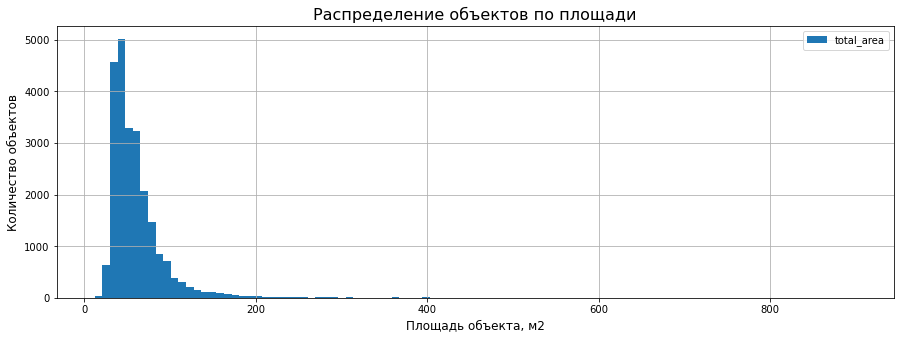

In [48]:
plt.xlabel('Площадь объекта, м2', size = 12)
plt.ylabel('Количество объектов', size = 12)
plt.title('Распределение объектов по площади', size = 16)

df['total_area'].hist(figsize=(15,5), bins=100, legend=True)

plt.show()

Параметр `total_area` имеет близкое к Пуассоновскому распределение.

Количество объектов с площадью более 200 м2 незначительное. Чтобы точнее определить пик изменим границы.

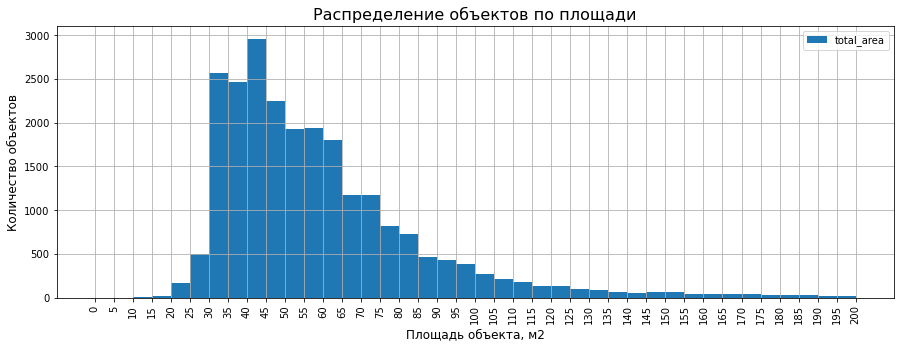

In [49]:
plt.xlabel('Площадь объекта, м2', size = 12)
plt.ylabel('Количество объектов', size = 12)
plt.title('Распределение объектов по площади', size = 16)
plt.xticks(np.arange(0, 201, 5), rotation=90)

df['total_area'].hist(figsize=(15,5), bins=40, legend=True, range=(0, 200))

plt.show()

По гистограмме видно что основная масса квартир приходится на площади менее 65 м2.

Наиболее часто встречающееся значение - 40-45 м2.

Теперь изучим данные в столбце `last_price`

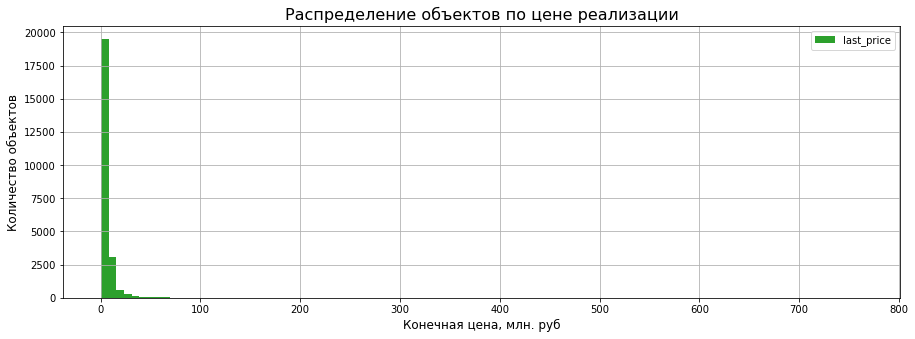

In [50]:
plt.xlabel('Конечная цена, млн. руб', size = 12)
plt.ylabel('Количество объектов', size = 12)
plt.title('Распределение объектов по цене реализации', size = 16)

(df['last_price']/1000000).hist(figsize=(15,5), bins=100, legend=True, color='C2')

plt.show()

Рассмотрим основной сегмент с ценой от 0 до 10 миллионов рублей.

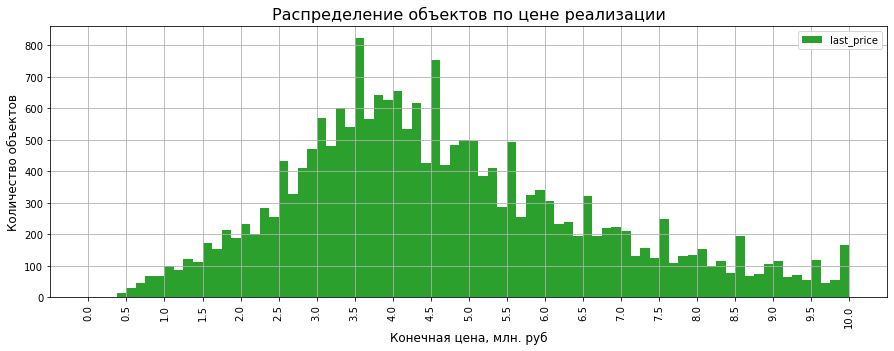

In [51]:
plt.xlabel('Конечная цена, млн. руб', size = 12)
plt.ylabel('Количество объектов', size = 12)
plt.title('Распределение объектов по цене реализации', size = 16)
plt.xticks(np.arange(0, 10.5, 0.5).astype('float'), rotation=90)

(df['last_price']/1000000).hist(figsize=(15,5), bins=80, legend=True, range=(0, 10), color='C2')

plt.show()

Данные в столбце `last_price` имеют распределение близкое к распределению Пусассона.

Наибольшее количество проданных объектов находятся по цене в диапазоне 3.0-5.5 миллионов рублей.

Изучим распределение объектов по количеству комнат.

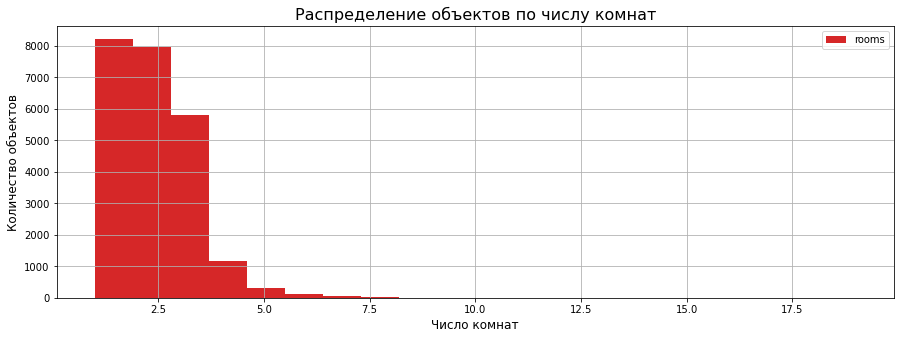

In [52]:
plt.xlabel('Число комнат', size = 12)
plt.ylabel('Количество объектов', size = 12)
plt.title('Распределение объектов по числу комнат', size = 16)

df['rooms'].hist(figsize=(15,5), bins=20, legend=True, color='C3')

plt.show()

Рассмотрим подробнее диапазон от 1 до 5 комнат.

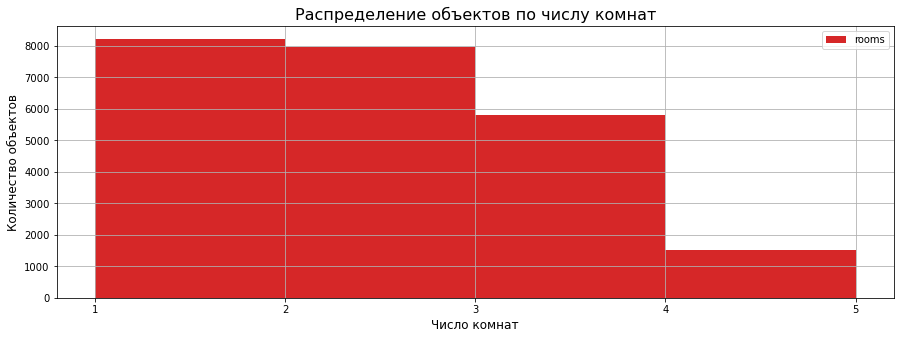

In [53]:
plt.xlabel('Число комнат', size = 12)
plt.ylabel('Количество объектов', size = 12)
plt.title('Распределение объектов по числу комнат', size = 16)
plt.xticks(np.arange(0, 6, 1))

df['rooms'].hist(figsize=(15,5), bins=4, legend=True, range=(1, 5), color='C3')

plt.show()

Наибольшее число проданных объектов имели одну комнату, с небольшим отставанием идёт категория с 2мя комнатами.

Наконец, рассмотрим распределение высот потолков.

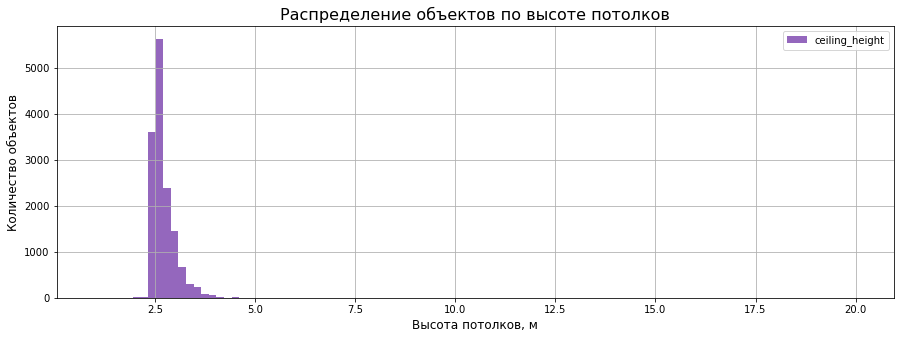

In [54]:
plt.xlabel('Высота потолков, м', size = 12)
plt.ylabel('Количество объектов', size = 12)
plt.title('Распределение объектов по высоте потолков', size = 16)

df['ceiling_height'].hist(figsize=(15,5), bins=100, legend=True, color='C4')

plt.show()

Рассмотрим подробнее диапазон от 2 до 4 метров, на который приходится большая часть записей.

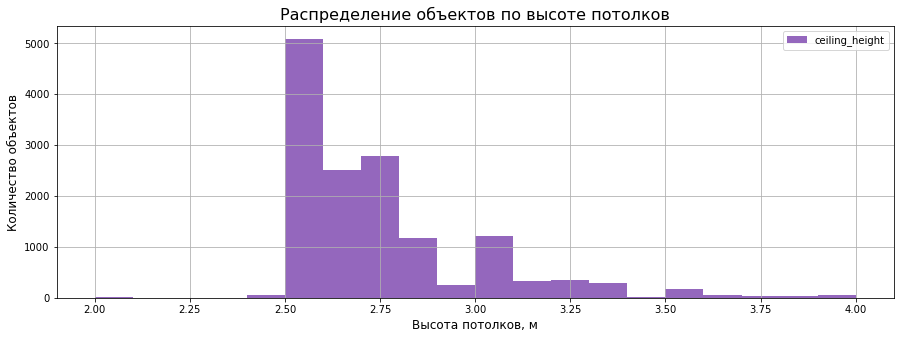

In [55]:
plt.xlabel('Высота потолков, м', size = 12)
plt.ylabel('Количество объектов', size = 12)
plt.title('Распределение объектов по высоте потолков', size = 16)

df['ceiling_height'].hist(figsize=(15,5), bins=20, legend=True, range=(2, 4), color='C4')

plt.show()

Из гистограммы видно что основная часть объектов имеет высоту потолков от 2.5 до 3.5 м, с пиком на 2.5 м.

### Вывод

Мы изучили данные по нескольким отдельным параметрам. Данные в изученных столбцах имеют распределение Пуассона.

Основная масса объектов имеет следующие параметры:
   * площадь от 30 до 85 метров квадратных,
   * цена от 3.0 до 5.5 миллионов рублей,
   * количество комнат от 1 до 3,
   * высота потолков от 2.50 до 3.00 метров.

Далее перейдём к изучению времени продажи квартир.

## 4.2. Изучение времени продажи квартиры <a id="step42"></a>

Изучим время продажи квартиры. Построим гистограмму.

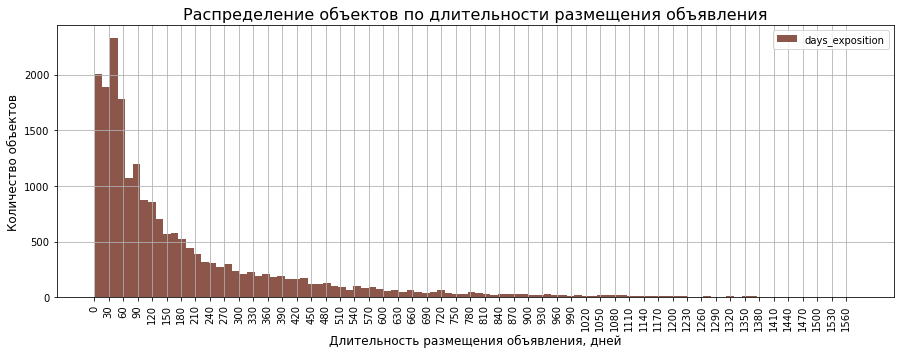

In [56]:
plt.xlabel('Длительность размещения объявления, дней', size = 12)
plt.ylabel('Количество объектов', size = 12)
plt.title('Распределение объектов по длительности размещения объявления', size = 16)
plt.xticks(np.arange(0, max(df.query('days_exposition == days_exposition')['days_exposition']), 30), rotation=90)

df['days_exposition'].hist(figsize=(15, 5), bins=100, legend=True, color='C5')

plt.show()

Посчитаем среднее и медиану.

In [57]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Вывод

Гистограмма распределения объектов недвижимости в зависимости от времени размещения объявления на площадке имеет распределение Пуассона.

Есть объекты которые были реализованы за 1 день, но также есть и те что висели по несколько лет.

Среднее время продажи составило 180 дней, в то время как медианное - 95 дней, почти в 2 раза инже из-за приличного количества долгих объявлений.

Можно считать что объект продан быстро если он попал в первый квартиль, т.е. время продажи менее 45 дней.

Долгими продажами назовём те что попали в четвёртый квартиль, т.е. время продажи более 232 дней.

## 4.3. Уберём редкие и выбивающиеся значения <a id="step43"></a>

Аномальные значения мы убрали ещё на этапе предобработки данных. Однако, редкие и выбивающиеся значения могут помешать анализировать зависимости графически.

Проверим это построив диаграмму рассеяния стоимости объекта в зависимости от площади.

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

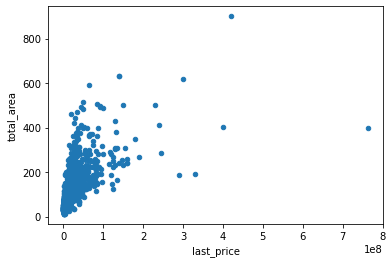

In [58]:
df.plot(x='last_price', y='total_area', kind='scatter')

Все данные реальны, но мешают рассмотреть происходящее с основной массой объектов.

Попробуем убрать выбивающиеся значения для нескольких столбцов, оставив только те что ниже 99 перцентиля.

In [59]:
q99_price = df['last_price'].quantile(0.99)
q99_area = df['total_area'].quantile(0.99)
q99_rooms = df['rooms'].quantile(0.99)

df_cleared = df.query('\
    (last_price < @q99_price)\
    & (total_area < @q99_area)\
    & (rooms < @q99_rooms)\
')

А теперь снова построим диаграмму рассеяния.

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

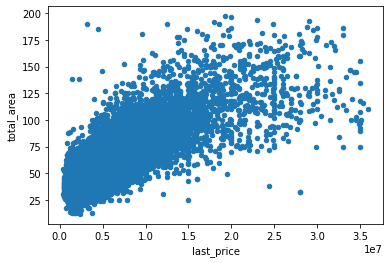

In [60]:
df_cleared.plot(x='last_price', y='total_area', kind='scatter')

### Вывод

Отбросив только 1% выбивающихся значений (суммарно 3% строк) мы улучшили читаемость графиков, что поможет нам в дальнейшем анализе и поиске зависимостей. Однако, отбросив даже 1% выбивающихся значений, мы сильно изменили средние значения для этих данных, поэтому при изучении средней величины следует апеллировать к датасету df.

Можно переходить к изучению факторов влияющих на стоимость квартиры.

## 4.4. Изучим влияние различных факторов на стоимость квартиры <a id="step44"></a>

Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

In [61]:
df[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.653741,0.366965,-0.206781
total_area,0.653741,1.000000,0.762353,-0.231446
rooms,0.366965,0.762353,1.000000,-0.188035
city_centers_nearest,-0.206781,-0.231446,-0.188035,1.000000


Из матрицы коэффициентов корреляции Пирсона можно сделать предварительный вывод о том что стоимость должна сильно зависеть от общей площади, средне зависеть от количества комнат и иметь небольшую обратную зависимость от расстояния до центра города.

Проверим наши предположения построив матрицу диаграмм рассеяния.

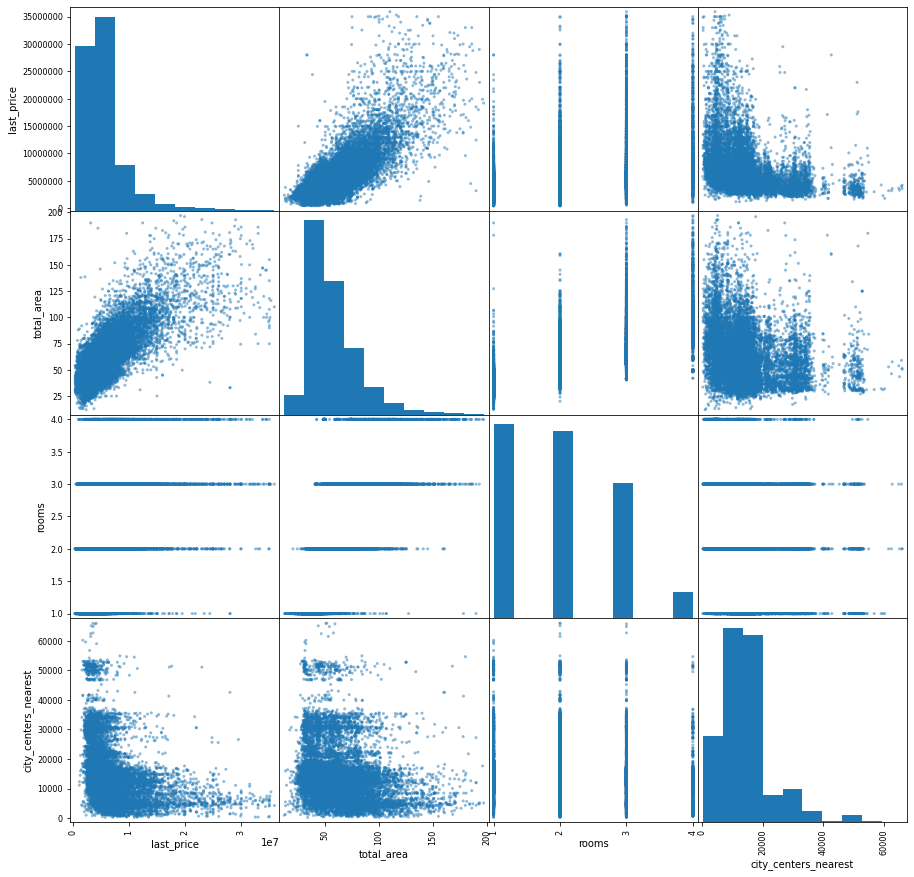

In [62]:
pd.plotting.scatter_matrix(df_cleared[['last_price', 'total_area', 'rooms', 'city_centers_nearest']], figsize=(15, 15))

plt.show()

Все наши предварительные выводы подтвердились.

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

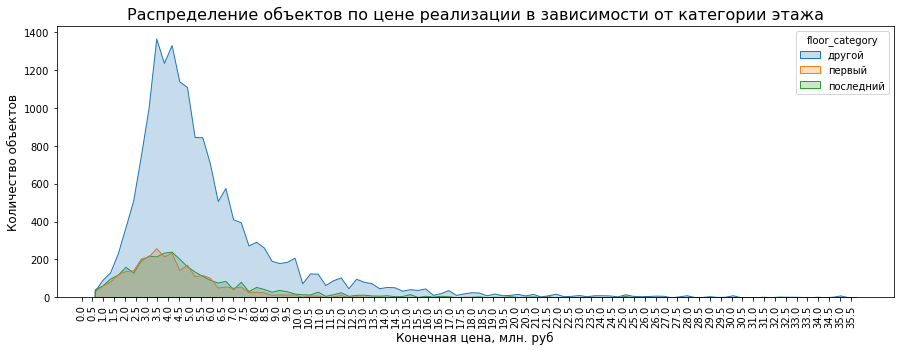

In [63]:
df_modified = df_cleared.copy()
df_modified['last_price'] = df_modified['last_price']/1000000 # уменьшим размерность, улучшим читаемость

f, ax = plt.subplots(figsize=(15, 5))

sns.histplot(
    df_modified,
    x='last_price', hue='floor_category',
    multiple='layer',
    bins=100,
    element='poly'
)

plt.xlabel('Конечная цена, млн. руб', size = 12)
plt.ylabel('Количество объектов', size = 12)

plt.title('Распределение объектов по цене реализации в зависимости от категории этажа', size = 16)

plt.xticks(np.arange(0, max(df_modified['last_price']), 0.5), rotation=90)

plt.show()

По графику видно что, хотя количество объектов в категориях разное, между категориями `первый этаж` и `последний этаж` существенной разницы нет.

Все три группы имеют пуассоновское распределение, однако пик значений группы `другой этаж` имеет смещение по цене относительно двух других в сторону увеличения, примерно на 0,5 млн. рублей.

Теперь рассмотрим зависимость стоимости квартиры от времени подачи объявления: дня недели, месяца и года.

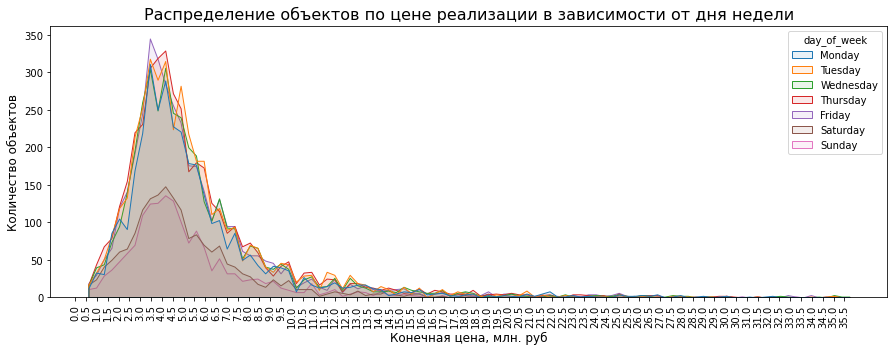

In [64]:
f, ax = plt.subplots(figsize=(15, 5))

sns.histplot(
    df_modified,
    x='last_price', hue='day_of_week',
    multiple='layer',
    bins=100,
    element='poly',
    alpha=0.1
)

plt.xlabel('Конечная цена, млн. руб', size = 12)
plt.ylabel('Количество объектов', size = 12)

plt.title('Распределение объектов по цене реализации в зависимости от дня недели', size = 16)

plt.xticks(np.arange(0, max(df_modified['last_price']), 0.5), rotation=90)

plt.show()

Как видно из гистограммы, цена объекта не зависит от дня недели. Единственная разница - уменьшенное почти в 2 раза количество объявлений по выходным.

Проверим зависимость от месяца.

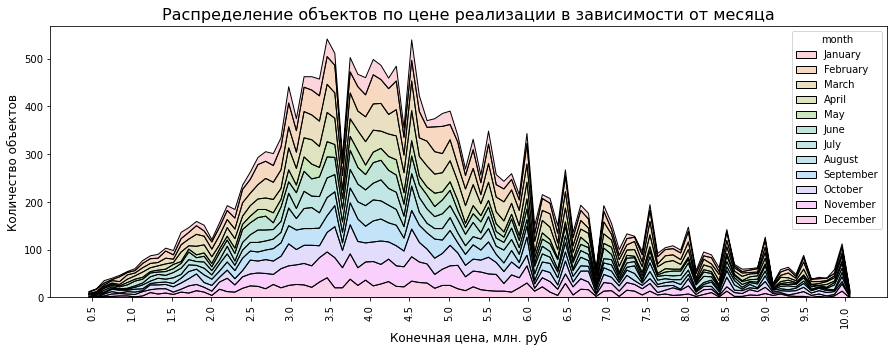

In [65]:
f, ax = plt.subplots(figsize=(15, 5))

sns.histplot(
    df_modified,
    x='last_price', hue='month',
    multiple='stack',
    bins=100,
    element='poly',
    binrange=(0.4, 10.1),
    alpha=0.3
)

plt.xlabel('Конечная цена, млн. руб', size = 12)
plt.ylabel('Количество объектов', size = 12)

plt.title('Распределение объектов по цене реализации в зависимости от месяца', size = 16)

plt.xticks(np.arange(0.5, 10.1, 0.5), rotation=90)

plt.show()

В целом картина не меняется от месяца к месяцу в плане распределения доли объектов по цене.

При этом видна зависимость общей доли от месяцев, посмотрим подробнее.

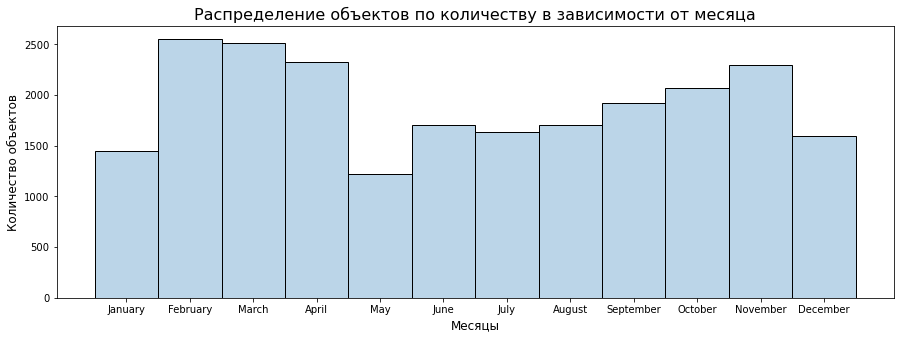

In [66]:
f, ax = plt.subplots(figsize=(15, 5))

sns.histplot(
    df_modified,
    x='month',
    alpha=0.3
)

plt.xlabel('Месяцы', size = 12)
plt.ylabel('Количество объектов', size = 12)

plt.title('Распределение объектов по количеству в зависимости от месяца', size = 16)

plt.show()

Видны провалы в январе, мае и декабре, вероятно, связанные с праздниками и пониженной активностью пользователей.

Наибольшая активность наблюдается весной и осенью, начиная с сентября.

Изучим зависимость цены продажи от года выставления объявления.

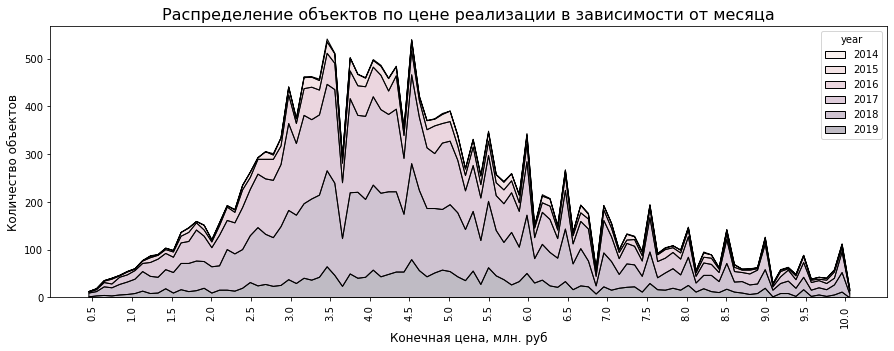

In [67]:
f, ax = plt.subplots(figsize=(15, 5))

sns.histplot(
    df_modified,
    x='last_price', hue='year',
    multiple='stack',
    bins=100,
    element='poly',
    binrange=(0.4, 10.1),
    alpha=0.3
)

plt.xlabel('Конечная цена, млн. руб', size = 12)
plt.ylabel('Количество объектов', size = 12)

plt.title('Распределение объектов по цене реализации в зависимости от месяца', size = 16)

plt.xticks(np.arange(0.5, 10.1, 0.5), rotation=90)

plt.show()

Опять отстутствует зависимость цены от года (пики не смещены), но виден рост общего количества объявлений от года к году. В 2019 году статистика собрана не полностью.

### Вывод

Стоимость объекта сильно зависит от общей площади, средне зависит от количества комнат и имеет небольшую обратную зависимость от расстояния до центра города.

Распределение объектов по стоимостям слабо зависит от категории этажа.
Между категориями `первый этаж` и `последний этаж` существенной разницы нет.
Все три группы имеют пуассоновское распределение, однако пик значений группы `другой этаж` имеет смещение по цене относительно двух других в сторону увеличения, примерно на 0,5 млн. рублей.

Стоимость объекта не зависит напрямую от дня недели. Но количество объявлений зависит, по выходным оно уменьшается почти в 2 раза.

Стоимость объекта не зависит от месяца подачи объявлений, но количество зависит. Видны провалы в январе, мае и декабре, вероятно, связанные с праздниками и пониженной активностью пользователей. Наибольшая активность наблюдается весной с февраля и осенью с сентября.

От года к году общее количество объявлений растёт, но зависимости стоимости от года нет, что странно. Возможно данные были скорректированы при выгрузке на коэффициент инфляции.

## 4.5. Изучим зависимость стоимости от населённого пункта <a id="step45"></a>

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [68]:
sorted_locality = df_modified.pivot_table(index='locality_name', values='square_price', aggfunc=['count', 'mean'])
sorted_locality.columns = ['count', 'mean']
sorted_locality.sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15074,111338.028261
посёлок Мурино,520,85838.600000
посёлок Шушары,438,78710.714612
Всеволожск,398,68654.007538
Пушкин,360,103051.755556
Колпино,335,75420.301493
посёлок Парголово,326,90331.840491
Гатчина,306,68797.248366
деревня Кудрово,299,92473.086957


### Вывод

Город с самым большим количеством объявлений, ожидаемо, **Санкт-Петербург**. Замыкает десятку **Выборг**.

Самая большая стоимость квадратного метра в **Санкт-Петербурге** - 111338 рублей.

Самая низкая стоимость квадрата среди городов первой десятки в **Выборге** - 58208 рублей.

## 4.6. Изучим зависимость стоимости от удалённости от центра <a id="step46"></a>

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра.

In [69]:
df_spb = df_cleared.query('locality_name == "Санкт-Петербург"')

df_spb = df_spb.dropna(subset=['city_centers_nearest'])

df_spb['km_to_center'] = (df_spb['city_centers_nearest']/1000).astype('int')

df_spb['mean_square_price'] = df_spb.groupby('km_to_center')['square_price'].transform('mean')

Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

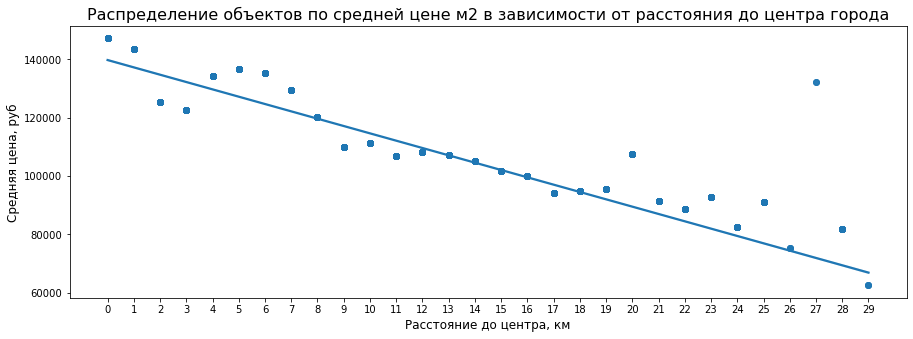

In [70]:
f, ax = plt.subplots(figsize=(15, 5))

sns.regplot(
    data=df_spb,
    x="km_to_center", y="mean_square_price",
)

plt.xlabel('Расстояние до центра, км', size = 12)
plt.ylabel('Средняя цена, руб', size = 12)

plt.title('Распределение объектов по средней цене м2 в зависимости от расстояния до центра города', size = 16)

plt.xticks(np.arange(0, 30, 1))

plt.show()

### Вывод

Скачок над линейной регрессией, по мере приближения к центру, позволил нам выделеть центральную зону с радиусом 8 км.

## 4.7. Выделим центральный сегмент и изучим квартиры в сравнении со всем городом <a id="step47"></a>

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

Сначала выделим все объекты не далее 8000 м от центра города в Санкт-Петербурге в отдельный датасет.

In [71]:
df_spb = df_cleared.query('(locality_name == "Санкт-Петербург") & (city_centers_nearest < 8000)')

Изучим площадь.

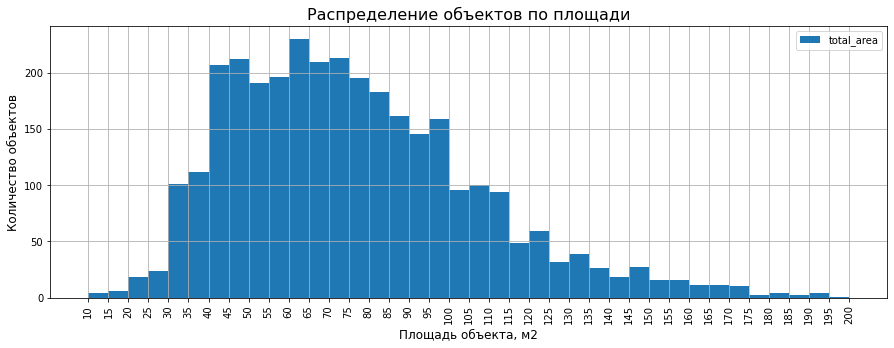

In [72]:
plt.xlabel('Площадь объекта, м2', size = 12)
plt.ylabel('Количество объектов', size = 12)
plt.title('Распределение объектов по площади', size = 16)
plt.xticks(np.arange(10, 201, 5), rotation=90)

df_spb['total_area'].hist(figsize=(15,5), bins=38, legend=True, range=(10, 200))

plt.show()

Параметр `total_area` имеет близкое к Пуассоновскому распределение.

По гистограмме видно что основная масса квартир приходится на площади менее 100 м2.

Наиболее часто встречающееся значение - 60-65 м2.

Теперь изучим данные в столбце `last_price`

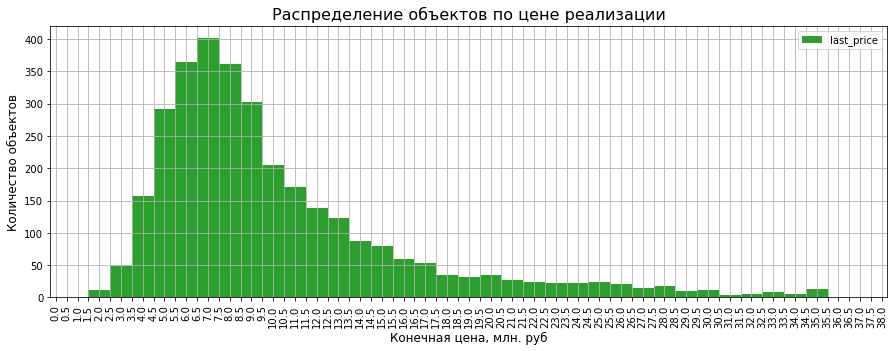

In [73]:
plt.xlabel('Конечная цена, млн. руб', size = 12)
plt.ylabel('Количество объектов', size = 12)
plt.title('Распределение объектов по цене реализации', size = 16)
plt.xticks(np.arange(0, 40, 0.5).astype('float'), rotation=90)

(df_spb['last_price']/1000000).hist(figsize=(15,5), bins=35, legend=True, range=(1.5, 36.5), color='C2')

plt.show()

Данные в столбце `last_price` имеют распределение близкое к распределению Пусассона.

Наибольшее количество проданных объектов находятся по цене в диапазоне 4.5-9.5 миллионов рублей.

Наиболее типичная цена объекта от 6.5 до 7.5 миллионов рублей.

Изучим распределение объектов по количеству комнат.

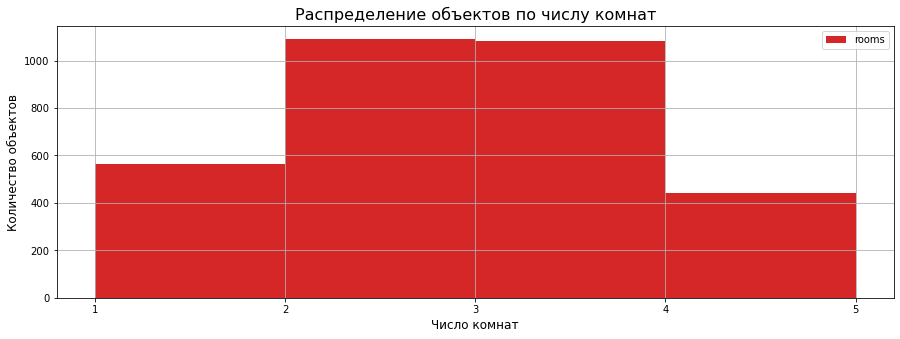

In [74]:
plt.xlabel('Число комнат', size = 12)
plt.ylabel('Количество объектов', size = 12)
plt.title('Распределение объектов по числу комнат', size = 16)
plt.xticks(np.arange(0, 6, 1))

df_spb['rooms'].hist(figsize=(15,5), bins=4, legend=True, range=(1, 5), color='C3')

plt.show()

Наибольшее число проданных объектов имеют от двух до трёх комнат.

Наконец, рассмотрим распределение высот потолков.

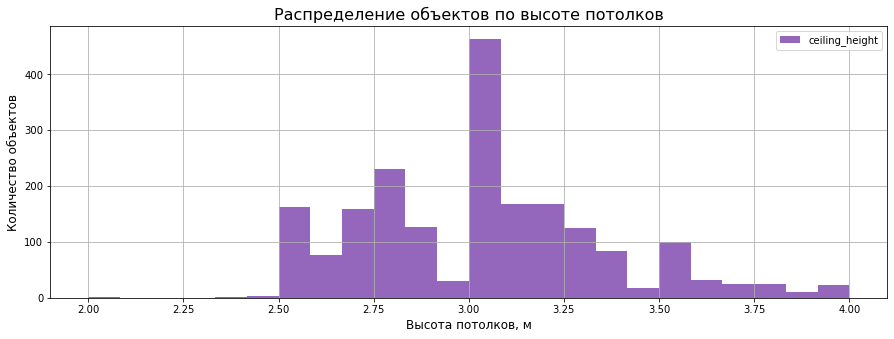

In [75]:
plt.xlabel('Высота потолков, м', size = 12)
plt.ylabel('Количество объектов', size = 12)
plt.title('Распределение объектов по высоте потолков', size = 16)

df_spb['ceiling_height'].hist(figsize=(15,5), bins=24, legend=True, range=(2, 4), color='C4')

plt.show()

Из гистограммы видно что основная часть объектов имеет высоту потолков от 2.5 до 3.5 м, с двумя пиками на 2.75 и 3.00 м.

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [76]:
df_spb[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.000000,0.713603,0.389709,-0.062781
total_area,0.713603,1.000000,0.734991,-0.139189
rooms,0.389709,0.734991,1.000000,-0.165479
city_centers_nearest,-0.062781,-0.139189,-0.165479,1.000000


Из матрицы коэффициентов корреляции Пирсона можно сделать предварительный вывод о том что стоимость должна сильно зависеть от общей площади, средне зависеть от количества комнат и почти не иметь зависимость от расстояния до центра города.

Проверим наши предположения построив матрицу диаграмм рассеяния.

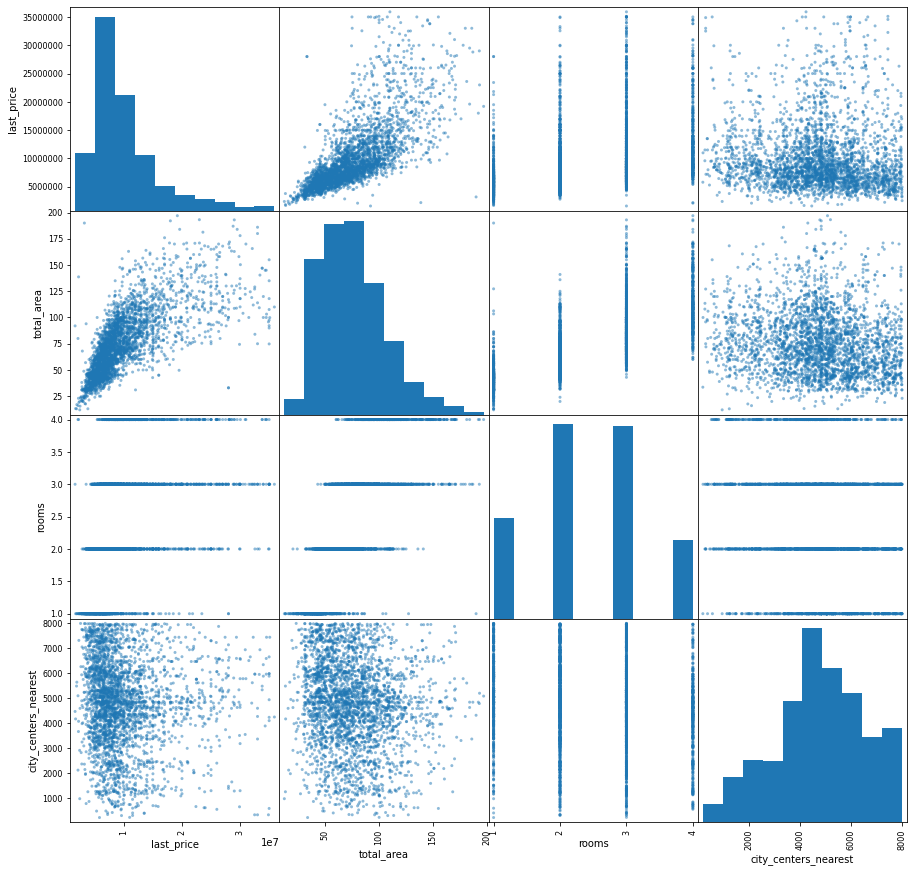

In [77]:
pd.plotting.scatter_matrix(df_spb[['last_price', 'total_area', 'rooms', 'city_centers_nearest']], figsize=(15, 15))

plt.show()

Предварительные выводы подтвердились.

### Вывод

Мы выделили центральную зону города Санкт-Петербург и изучили данные по ней. Между центральной зоной и всей областью есть отличия.

   * В центральной зоне основная масса квартир приходится на площади менее 100 м2, для всей области - 65 м2.
   * Наиболее часто встречающееся значение - 60-65 м2, для всей области - 40-45 м2.
   

   * Наибольшее количество проданных объектов находятся в диапазоне 4.5-9.5 млн. рублей, для области - 3.0-5.5 млн. рублей.
   * Наиболее типичная цена объекта от 6.5 до 7.5 млн. рублей, для области - 3.5-4.0 млн. рублей.
   
   
   * Типичное количество комнат для центральной зоны - 2-3, для области в целом 1-2.
   
   
   * Основная часть объектов центральной зоны имеет высоту потолков 2.5-3.5 м, так же как и для области.
   * Основная часть объектов центральной зоны имеет пик высоты потолков 2.75 и 3.00, для области - 2.5 м.
   
Цена объекта в центральной зоне так же как и в области сильно коррелирует с общей площадью, средне с количеством комнат.
А вот обратная корреляция цены от расстояния практически исчезла в центральной зоне.

## Общий вывод <a id="step5"></a>

Взяв датасет с сырыми данными мы провели работу по их подготовке:

   * заполнили пропущенные значения,
   * убрали аномальные данные,
   * заменили типы данных на более подходящие,
   * добавили необходимые для дальнейшего анализа данные,
   * убрали выбивающиеся значения для удобного анализа графиков.

Мы провели исследовательский анализ данных и изучили:

   * распределение площадей объектов,
   * цену объектов,
   * количества комнат,
   * высоты потолков.
   
Как для всей области, так и для центральной зоны Санкт-Петербурга, которую мы определили по резкому скачку цены за квадратный метр. Выявили различия и совпадения в распределении этих данных.

Проанализировали факторы влияющие на стоимость квартиры:

   * общей площади,
   * количества комнат,
   * расстояния от центра города,
   * категории этажа на котором размещён объект,
   * дня недели размещения объявления,
   * месяца,
   * года.